In [47]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

In [48]:
df = pd.read_csv('data.csv')

In [51]:
df = df.drop(df.columns[0],axis=1)
df

,clear,sand_soil_dirt,fog_smog_smoke,rain,crosswind,sleet_hail,snow,fatal
0,-1,0,0,0,0,0,0,1
1,-1,0,0,0,0,0,0,1
2,-1,0,0,0,0,0,0,1
3,-1,0,0,0,0,0,0,1
4,-1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4359,0,0,0,0,0,0,5,0
4360,0,0,0,0,0,0,5,0
4361,0,0,0,0,0,0,5,0
4362,0,0,0,0,0,0,5,0


In [52]:
y = df['fatal']
X = df.drop('fatal', axis=1)

scaler = MinMaxScaler()
for i in range(1000):
    X = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_drt = lgb.LGBMRegressor()
model_drt.fit(X_train, y_train)


In [56]:
y_pred_drt = model_drt.predict(X_test)


In [57]:
explainer_new_drt = shap.Explainer(model_drt, X)
new_shap_values_drt = explainer_new_drt(X)

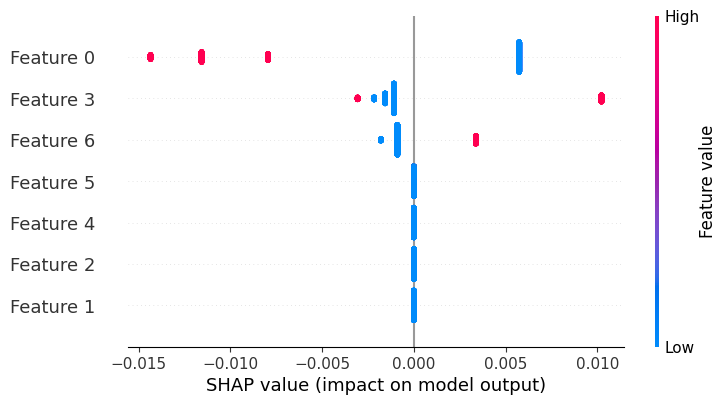

In [58]:
shap.plots.beeswarm(new_shap_values_drt)

In [59]:
dump(model_drt, 'model_drt.joblib')

['model_drt.joblib']